# Ungraded Lab: First Autoencoder (PyTorch version)

In this lab, you will build your first simple autoencoder. This will take in three-dimensional data, encodes it to two dimensions, and decodes it back to 3D.

## Imports

In [41]:
import torch
from torch import nn

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px #interactive 3d scatter plot

## Prepare and preview the dataset

You will first create a synthetic dataset to act as input to the autoencoder. You can do that with the function below.

In [3]:
def generate_data(m):
  '''plots m random points on a 3D plane'''

  angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
  data = np.empty((m, 3))
  data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
  data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
  data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
  return data

<ipython-input-24-f24b4add0f30>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds')


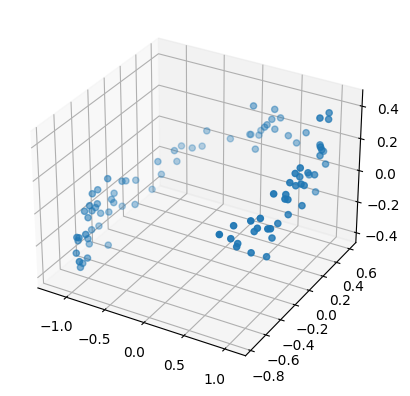

In [24]:
# use the function above to generate data points
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)
X_train = torch.tensor(X_train, dtype=torch.float32)

# preview the data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds')
plt.show()

In [42]:
fig = px.scatter_3d(x=X_train[:, 0], y=X_train[:, 1], z=X_train[:, 2])
fig.show()

## Build the Model
Now you will build the simple encoder-decoder model. Notice the number of neurons in each Dense layer. The model will contract in the encoder then expand in the decoder.

In [25]:
class Encoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Linear(in_features=3, out_features=2)

  def forward(self, x):
    return self.encoder(x)

class Decoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.decoder = nn.Linear(in_features=2, out_features=3)

  def forward(self, x):
    return self.decoder(x)


class AutoEncoder(nn.Module):
  def __init__(self, encoder, decoder):
    super().__init__()

    #Encoder
    self.encoder = encoder
    #Decoder
    self.decoder = decoder

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [27]:
encoder = Encoder()
decoder = Decoder()
autoencoder = AutoEncoder(encoder, decoder)

# Compile the Model
You can then setup the model for training.

In [28]:
optimizer = torch.optim.SGD(lr=0.1, params=autoencoder.parameters())
loss_fn = nn.MSELoss()

## Train the Model
You will configure the training to also use the input data as your target output. In our example, that will be `X_train`.

In [31]:
epochs = 1000

for epoch in range(epochs):
  autoencoder.train()
  y = autoencoder(X_train)
  loss = loss_fn(X_train, y)

  optimizer.zero_grad(); loss.backward(); optimizer.step()

  if epoch % 100 == 0:
    print(f"Epoch {epoch} | Loss: {loss.item()}")

Epoch 0 | Loss: 0.3480685353279114
Epoch 100 | Loss: 0.022375548258423805
Epoch 200 | Loss: 0.012491399422287941
Epoch 300 | Loss: 0.006852558348327875
Epoch 400 | Loss: 0.004597232677042484
Epoch 500 | Loss: 0.003770655719563365
Epoch 600 | Loss: 0.003440688131377101
Epoch 700 | Loss: 0.003279991913586855
Epoch 800 | Loss: 0.003180688712745905
Epoch 900 | Loss: 0.003107238095253706


## Plot the encoder output
As mentioned, you can use the encoder to compress the input to two dimensions.

In [33]:
# encode the data
with torch.inference_mode():
  codings = encoder(X_train)

# see a sample input-encoder output pair
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

input point: tensor([1.0303, 0.3838, 0.2219])
encoded point: tensor([0.6030, 1.0264])


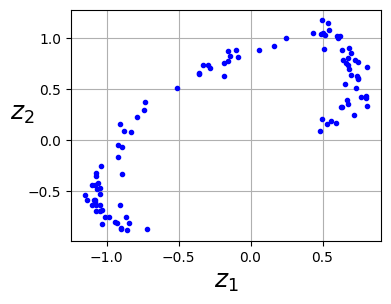

In [34]:
# plot all encoder outputs
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## Plot the Decoder Output
The decoder then tries to reconstruct the original input. See the outputs below. You will see that although not perfect, it still follows the general shape of the original input.

In [38]:
# decode the encoder output
with torch.inference_mode():
  decodings = decoder(codings)

# see a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

input point: tensor([1.0303, 0.3838, 0.2219])
encoded point: tensor([0.6030, 1.0264])
decoded point: tensor([1.0271, 0.3940, 0.2085])


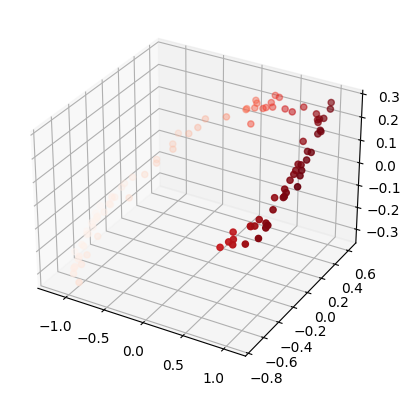

In [40]:
# plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');

In [45]:
fig = px.scatter_3d(x=decodings[:, 0], y=decodings[:, 1], z=decodings[:, 2])
fig.show()

That's it for this simple demonstration of the autoencoder!